# 📘 1. Carga de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.metrics import cdist_dtw
from sklearn.preprocessing import StandardScaler

c:\Users\FSONZOGNI\AppData\Local\anaconda3\envs\labo_III\lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


# ✅ 2. Cargar dataset parquet y filtro de productos objetivo

In [2]:
df = pd.read_parquet("C:/Developer/Laboratorio_III/data/dataset_product_periodo.parquet")
df_ids = pd.read_csv("C:/Developer/Laboratorio_III/data/product_id_apredecir201912.txt", sep='\\t')
product_ids_objetivo = df_ids['product_id'].unique()

df = df[df['product_id'].isin(product_ids_objetivo)].copy()

print(f"Productos únicos cargados: {df['product_id'].nunique()}")

Productos únicos cargados: 780


C:\Users\FSONZOGNI\AppData\Local\Temp\ipykernel_25712\97152395.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_ids = pd.read_csv("C:/Developer/Laboratorio_III/data/product_id_apredecir201912.txt", sep='\\t')


# 📘 3. Pivot para crear matriz de series
### Cada fila: un producto
### Cada columna: tn_total por fecha

In [4]:
# Asegurarse de fechas ordenadas
df = df.sort_values(['product_id', 'fecha'])
pivot_df = df.pivot(index='product_id', columns='fecha', values='tn_total').fillna(0)

print(f"✅ Matriz de series creada con forma: {pivot_df.shape}")

✅ Matriz de series creada con forma: (780, 36)


# 📘 4. Escalado (opcional)
### DTW es sensible a la escala: escalamos cada serie para tener media 0 y varianza 1

In [5]:
scaler = TimeSeriesScalerMeanVariance()
X_scaled = scaler.fit_transform(pivot_df.values)

print(f"✅ Series escaladas. Shape final: {X_scaled.shape}")

✅ Series escaladas. Shape final: (780, 36, 1)


# 📘 5. Clustering con DTW
### Definimos número de clusters. Probar con 3 como ejemplo.

In [6]:
n_clusters = 50

# Creamos el modelo con DTW como métrica de distancia
model = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", verbose=True, random_state=42)
labels = model.fit_predict(X_scaled)

print(f"✅ Clustering realizado. Labels: {labels}")

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)

7.612 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 6049 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 7199 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 8449 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 9799 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done 11249 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done 12799 tasks      | elapsed:    2.4s
[Parallel(

6.231 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 6049 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 7199 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 8449 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 9799 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done 11249 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done 12799 tasks      | elapsed:    2.4s
[Parallel(

6.080 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 6049 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 7199 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 8449 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 9799 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done 11249 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done 12799 tasks      | elapsed:    2.3s
[Parallel(

6.038 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 6049 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 7199 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 8449 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 9799 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done 11249 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done 12799 tasks      | elapsed:    2.4s
[Parallel(

6.031 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 6049 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 7199 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 8449 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 9799 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done 11249 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done 12799 tasks      | elapsed:    2.3s
[Parallel(

6.028 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 6049 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 7199 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 8449 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 9799 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done 11249 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done 12799 tasks      | elapsed:    2.4s
[Parallel(

6.022 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 6049 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 7199 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 8449 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 9799 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done 11249 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done 12799 tasks      | elapsed:    2.3s
[Parallel(

6.022 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 6049 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 7199 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 8449 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 9799 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 11249 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done 12799 tasks      | elapsed:    2.3s
[Parallel(

✅ Clustering realizado. Labels: [ 1  1  0 31 31  4 39 39  1  7  7 39 43 48 31  9  4  4  9  7  9  7 31  9
 41 24 45 35  4  9 48 10 31  7 20 35 18  7 32  7 43 48  0 45 12 39  9 39
 15 21  9  9 43 44 19 21  4 30 43 35 47 35 43 24 46 35 37 39 19 45 39 39
 19  4  0  1 17 31 25  3 20 25  0 21 19 48 31  0  4 31 26 38 18 21 24  0
 18 15 22 19  1 21  0 31  0  1 25 19  4 21 22  5 44 22 35 19 21  2 35 18
 43 41 20 22 47 37 42  1  1 18 20 37 37 37  1 22 14 24  1 22 47 37  4 22
 10 24  4 19 30 46 34 34  8 19 27 26 32 44 45 13 27 44 44 27 23 22 47  9
  0 44 30  5 47 32 36 49 39 22 18  7  9 25 12 19  1 39 13 35  1  1 20 10
 29 22 45 27 44 44  9 33 26 20 45 49 43 48  9  8 36 20  5 22 34 28 20 22
 34 27 49 48 42 27 44 49 15 30 31 46 45 32 26 35 20 10  0 45  1 12 35 24
 15 22 23  1 34 16 20 15 35 20 22 47  8 47 30 22 15 46 10  0 12 15 37 28
 22 26  9 34 26 31 34 18 40  2 14 27 23 21  2 27 14 23  2 26 23 46 20  2
 33 14 44 10 40 33  8 46  1 31 22  8 39 27  2 27 18 48  2 18 33 37 18 49
  0 34 34 23  8 22 

# 📘 6. Visualización de clusters

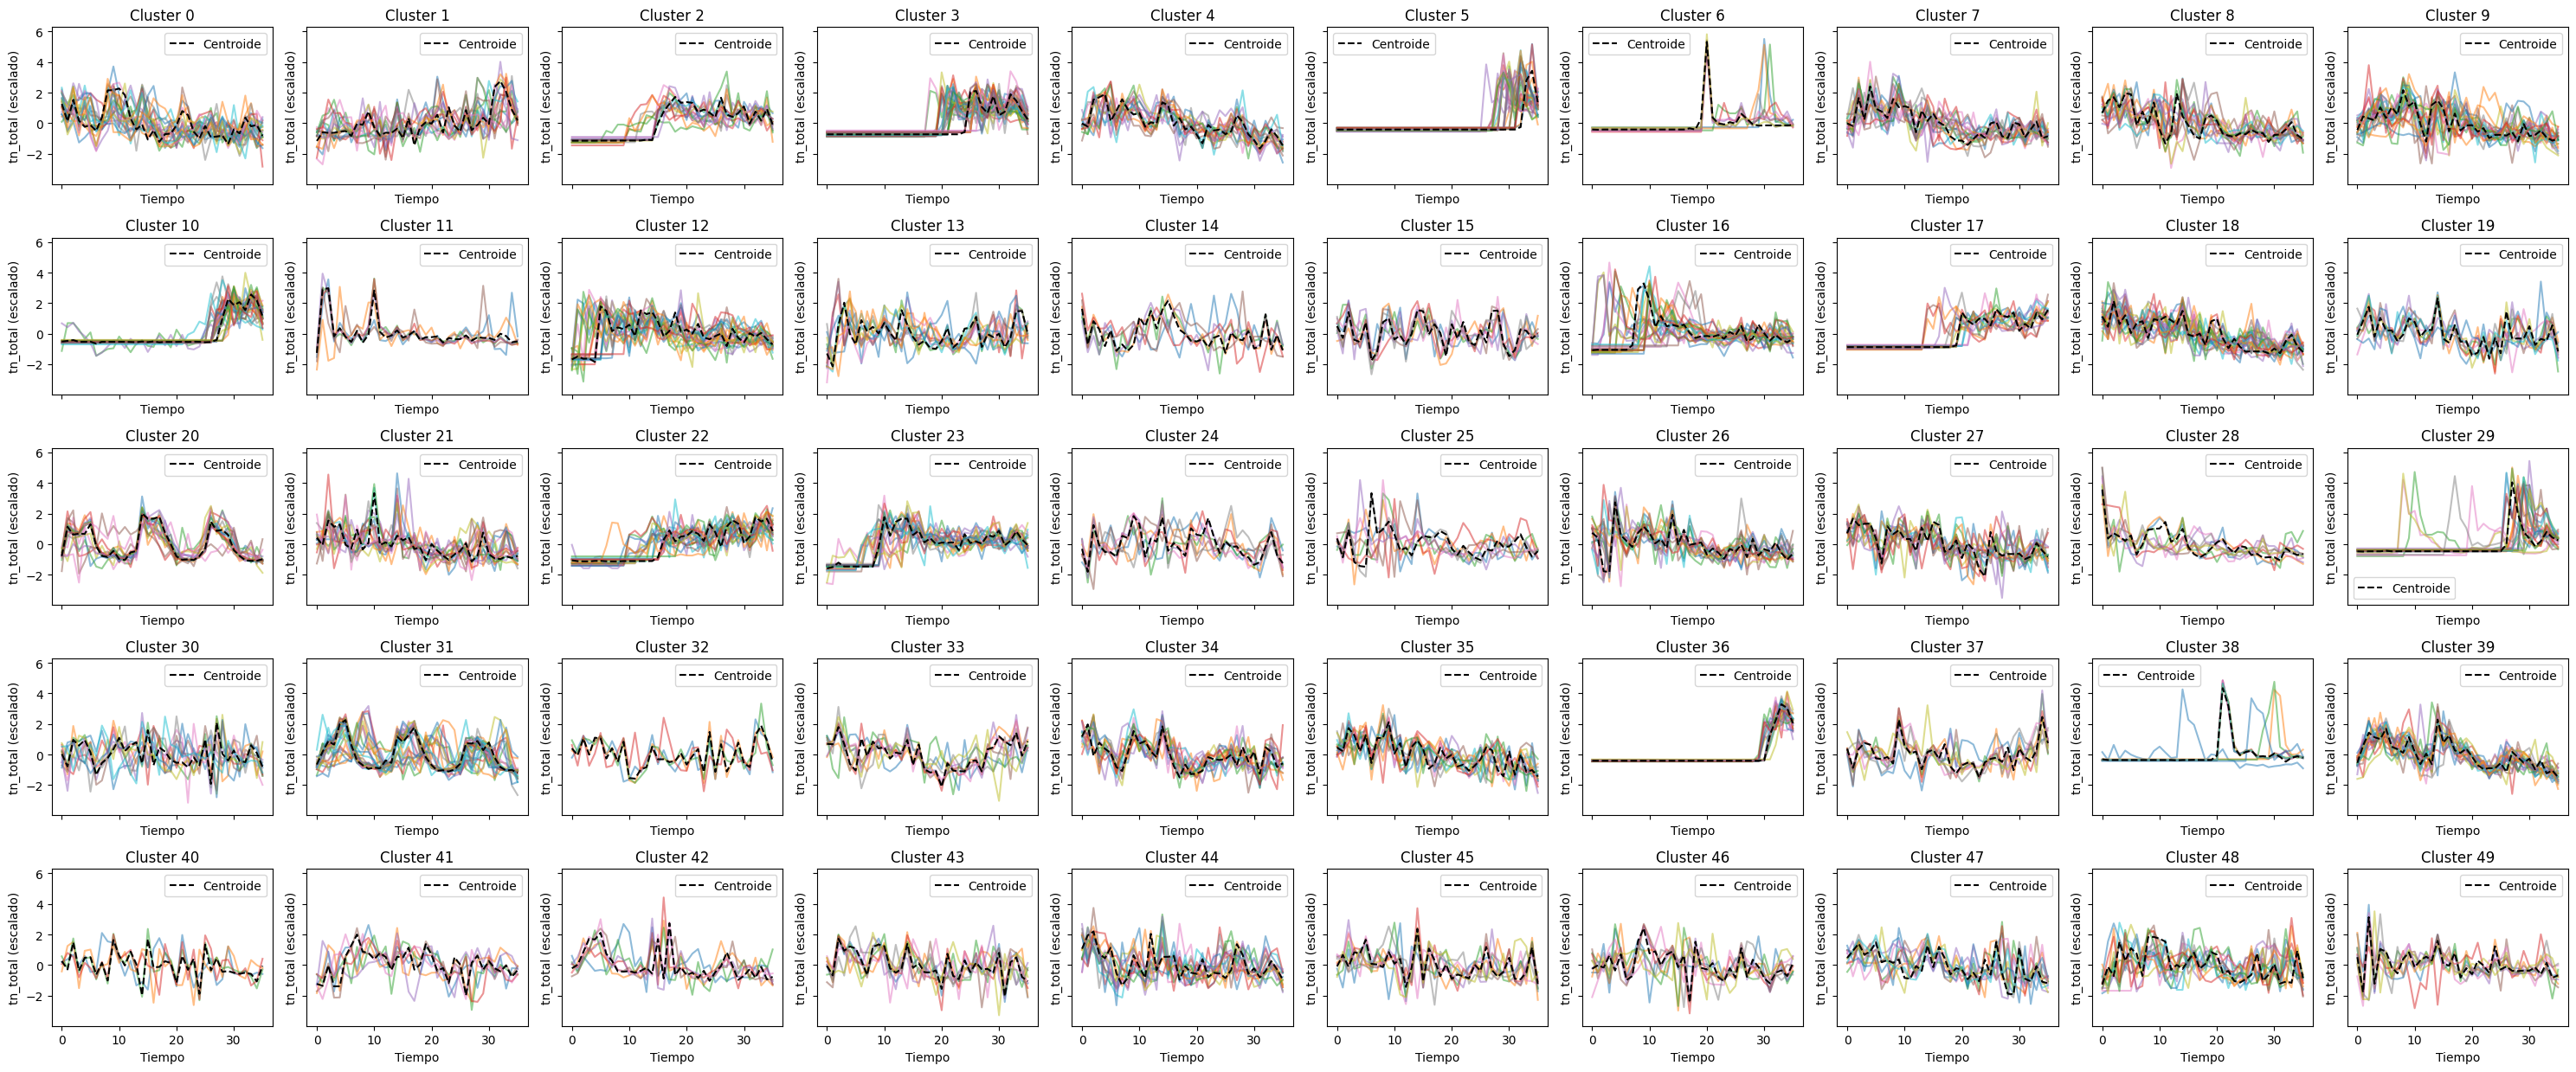

In [8]:
import math

cols = 10  # cantidad de columnas
rows = math.ceil(n_clusters / cols)  # cantidad de filas necesarias

fig, axes = plt.subplots(rows, cols, figsize=(3*cols, 2.5*rows), sharex=True, sharey=True)
axes = axes.flatten()

for cluster in range(n_clusters):
    ax = axes[cluster]
    for i in range(len(X_scaled)):
        if labels[i] == cluster:
            ax.plot(X_scaled[i].ravel(), "-", alpha=0.5)
    ax.plot(model.cluster_centers_[cluster].ravel(), "k--", label="Centroide")
    ax.set_title(f"Cluster {cluster}")
    ax.set_xlabel("Tiempo")
    ax.set_ylabel("tn_total (escalado)")
    ax.legend()

# Oculta los ejes vacíos si hay más subplots que clusters
for i in range(n_clusters, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# 📘 7. Guardar asignación de clusters

In [9]:
df_clusters = pd.DataFrame({
    'product_id': pivot_df.index,
    'cluster_dtw': labels
})
df_clusters.to_csv("clusters_dtw_sample.csv", index=False)

print("Archivo clusters_dtw_sample_completo.csv exportado.")

Archivo clusters_dtw_sample_completo.csv exportado.


# 📘 8 Calcular silhouette score para DTW
### tslearn no soporta directamente silhouette con DTW, así que se hace a mano

In [11]:
from tslearn.metrics import cdist_dtw
from sklearn.metrics import silhouette_score

# Calcular matriz de distancias DTW entre series
distance_matrix = cdist_dtw(X_scaled)

silhouette_avg = silhouette_score(distance_matrix, labels, metric="precomputed")

print(f"Silhouette score (DTW): {silhouette_avg:.4f}")

Silhouette score (DTW): 0.0679


# 📘 9 Guardar modelo entrenado

In [12]:
import joblib

joblib.dump(model, "dtw_timeseries_kmeans_model.pkl")
print("Modelo DTW guardado como dtw_timeseries_kmeans_model.pkl")

# 📘 9.2. Guardar centroides
centroides_df = pd.DataFrame(model.cluster_centers_.reshape(n_clusters, -1).T, columns=[f"cluster_{i}" for i in range(n_clusters)])
centroides_df['fecha'] = pivot_df.columns.values
centroides_df.to_csv("dtw_cluster_centroids.csv", index=False)

print("Archivo dtw_cluster_centroids.csv exportado con los centroides.")

Modelo DTW guardado como dtw_timeseries_kmeans_model.pkl
Archivo dtw_cluster_centroids.csv exportado con los centroides.


# 📘 10 Crear DataFrame de clusters asignados

In [13]:
df_clusters = pd.DataFrame({
    'product_id': pivot_df.index,
    'cluster_dtw': labels
})

# 📘 10.2. Unir cluster al dataset original
df_final = df.merge(df_clusters, on='product_id', how='left')

print(f"Dataset original enriquecido con cluster_dtw. Shape: {df_final.shape}")

# 📘 10.3. Guardar dataset enriquecido
df_final.to_parquet("dataset_product_periodo_con_clusters.parquet", index=False)
print("Archivo dataset_product_periodo_con_clusters.parquet exportado.")

Dataset original enriquecido con cluster_dtw. Shape: (22375, 14)
Archivo dataset_product_periodo_con_clusters.parquet exportado.


# 📘 11. Análisis descriptivo por cluster DTW

### Si ya tienes df_final (dataset original + cluster_dtw):
### Verifica que existe

   product_id      fecha    tn_total  cluster_dtw
0       20001 2017-01-01   934.77222            1
1       20001 2017-02-01   798.01620            1
2       20001 2017-03-01  1303.35771            1
3       20001 2017-04-01  1069.96130            1
4       20001 2017-05-01  1502.20132            1
n Resumen por cluster:
    cluster_dtw  productos  observaciones  media_tn_total  mediana_tn_total  \
0             0         22            792       78.150710         14.464165   
1             1         17            597      209.014773         41.515470   
2             2         15            349       19.422562         12.771190   
3             3         38            540       14.350347          8.817570   
4             4         16            576      129.618928         60.003370   
5             5         35            223       14.267060          4.955990   
6             6          9            124        0.613149          0.153705   
7             7         18            648    

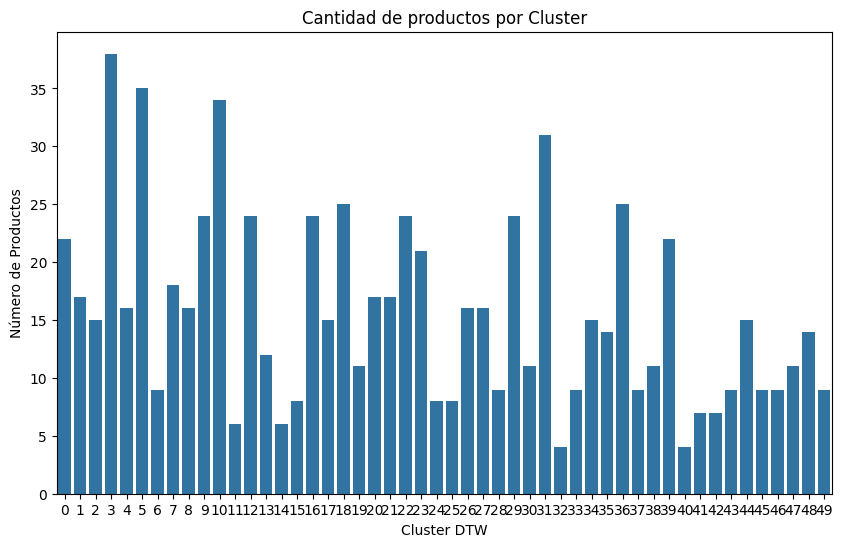

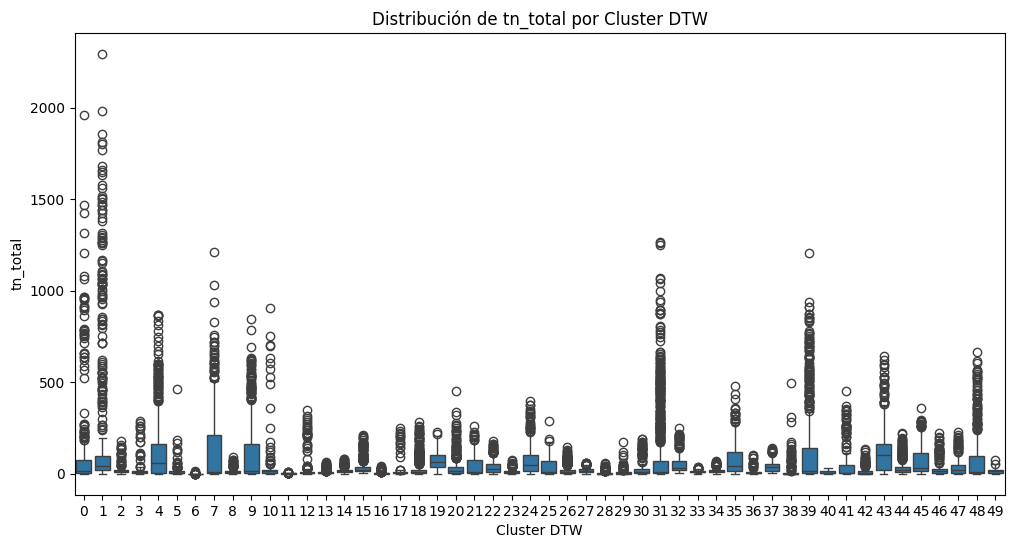

In [ ]:
print(df_final[['product_id', 'fecha', 'tn_total', 'cluster_dtw']].head())

resumen_clusters = (
    df_final
    .groupby('cluster_dtw')
    .agg(
        productos=('product_id', 'nunique'),
        observaciones=('product_id', 'count'),
        media_tn_total=('tn_total', 'mean'),
        mediana_tn_total=('tn_total', 'median'),
        std_tn_total=('tn_total', 'std'),
        min_tn_total=('tn_total', 'min'),
        max_tn_total=('tn_total', 'max')
    )
    .reset_index()
)

print("n Resumen por cluster:")
print(resumen_clusters)

# 11.2. Distribución de productos por cluster
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='cluster_dtw', data=df_final.drop_duplicates(['product_id', 'cluster_dtw']))
plt.title('Cantidad de productos por Cluster')
plt.xlabel('Cluster DTW')
plt.ylabel('Número de Productos')
plt.show()

# 11.3. Boxplot de tn_total por cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster_dtw', y='tn_total', data=df_final)
plt.title('Distribución de tn_total por Cluster DTW')
plt.xlabel('Cluster DTW')
plt.ylabel('tn_total')
plt.show()